In [1]:
from sklearn.datasets import load_boston

In [2]:
data=load_boston()

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [7]:
X_train, X_test, y_trian, y_test=train_test_split(data.data,data.target)

In [14]:
print(X_train.shape,y_trian.shape,X_test.shape,y_test.shape)

(379, 13) (379,) (127, 13) (127,)


In [3]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [92]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.layers import Dropout

In [22]:
data=load_boston()

In [23]:
model=Sequential()

In [24]:
model.add(Dense(13,input_dim=13,activation='relu'))

In [25]:
model.add(Dense(1))

In [26]:
from keras import losses

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.fit(X_train,y_trian,validation_data=(X_test,y_test),epochs=10)

Train on 379 samples, validate on 127 samples
Epoch 1/10
379/379 [==============================] - 0s 106us/step - loss: 549.5873 - val_loss: 475.3332
Epoch 2/10
379/379 [==============================] - 0s 109us/step - loss: 540.7599 - val_loss: 467.3672
Epoch 3/10
379/379 [==============================] - 0s 101us/step - loss: 531.5691 - val_loss: 458.9301
Epoch 4/10
379/379 [==============================] - 0s 107us/step - loss: 521.8075 - val_loss: 450.0150
Epoch 5/10
379/379 [==============================] - 0s 104us/step - loss: 511.7850 - val_loss: 440.4776
Epoch 6/10
379/379 [==============================] - 0s 98us/step - loss: 500.7625 - val_loss: 430.5582
Epoch 7/10
379/379 [==============================] - 0s 101us/step - loss: 489.5882 - val_loss: 420.1063
Epoch 8/10
379/379 [==============================] - 0s 108us/step - loss: 477.6169 - val_loss: 409.3302
Epoch 9/10
379/379 [==============================] - 0s 100us/step - loss: 465.4893 - val_loss: 398.1398
E

# Binary Classification

In [49]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [50]:
target=data.target*-1+1

In [51]:
X_train, X_test, y_train, y_test=train_test_split(data.data,target)

In [52]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(426, 30) (426,) (143, 30) (143,)


In [54]:
from sklearn.pipeline import Pipeline

In [55]:
def model_funk(input_dim=30, layer_one_neurons=30, layer_two_neurons=20):
    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model




ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])


pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ff_model', ff_model)
])


params = {
    'ff_model__epochs': [5],
    'ff_model__batch_size': [50],
    'ff_model__layer_one_neurons': [20, 30],
    'ff_model__layer_two_neurons': [30, 50]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.950704227591
{'ff_model__layer_one_neurons': 30, 'ff_model__batch_size': 50, 'ff_model__layer_two_neurons': 30, 'ff_model__epochs': 5}


In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [46]:
def model_funk(input_dim=X_train.shape[1], layer_one_neurons=30):
    model=Sequential()
    model.add(Dense(30, input_dim=input_dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [47]:
ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])

params = {
    'epochs': [10],
    'batch_size':[50],
    'layer_one_neurons': [10, 20, 30]
    
}

gs = GridSearchCV(ff_model, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.950704224792
{'layer_one_neurons': 20, 'batch_size': 50, 'epochs': 10}


In [48]:
def model_funk(input_dim=30, layer_one_neurons=30, layer_two_neurons=20):
    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim=input_dim, activation='relu'))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model




ff_model = KerasClassifier(build_fn=model_funk, verbose=0, input_dim=X_train.shape[1])

params = {
    'epochs': [10],
    'batch_size': [50],
    'layer_one_neurons': [10, 20, 30],
    'layer_two_neurons': [30, 50]
}

gs = GridSearchCV(ff_model, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.950704216957
{'layer_one_neurons': 30, 'batch_size': 50, 'layer_two_neurons': 30, 'epochs': 10}


In [50]:
model = Sequential()

model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15，matri)

Train on 426 samples, validate on 143 samples
Epoch 1/15
426/426 [==============================] - 0s 575us/step - loss: 0.6107 - val_loss: 0.4979
Epoch 2/15
426/426 [==============================] - 0s 120us/step - loss: 0.4308 - val_loss: 0.3635
Epoch 3/15
426/426 [==============================] - 0s 130us/step - loss: 0.3256 - val_loss: 0.2841
Epoch 4/15
426/426 [==============================] - 0s 138us/step - loss: 0.2607 - val_loss: 0.2352
Epoch 5/15
426/426 [==============================] - 0s 127us/step - loss: 0.2199 - val_loss: 0.2016
Epoch 6/15
426/426 [==============================] - 0s 142us/step - loss: 0.1909 - val_loss: 0.1795
Epoch 7/15
426/426 [==============================] - 0s 137us/step - loss: 0.1708 - val_loss: 0.1631
Epoch 8/15
426/426 [==============================] - 0s 132us/step - loss: 0.1549 - val_loss: 0.1501
Epoch 9/15
426/426 [==============================] - 0s 124us/step - loss: 0.1422 - val_loss: 0.1400
Epoch 10/15
426/426 [===============

In [60]:
from sklearn.datasets import load_iris
data=load_iris()

In [61]:
X_train, X_test, y_trian, y_test=train_test_split(data.data,data.target)

In [62]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [63]:
from keras import utils

In [64]:
y_train=utils.to_categorical(y_train)
y_test=utils.to_categorical(y_test)

In [65]:
model=Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile()

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
%matplotlib inline
from keras.utils import to_categorical

In [61]:
data=fetch_lfw_people(min_faces_per_person=70)

In [64]:
y=to_categorical(data.target)
X_train,X_test,y_train,y_test=train_test_split(data.data,y)

In [65]:
X_train=X_train/255.
X_test=X_test/255.

# Image Recognition

In [71]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [69]:
data=fetch_lfw_people(min_faces_per_person=70)

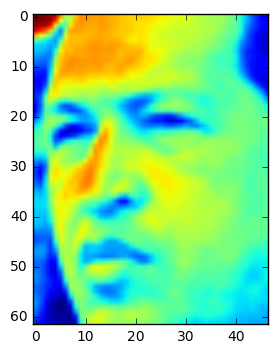

In [72]:
plt.imshow(data.images[0])

In [74]:
data.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], 
      dtype='<U17')

In [88]:
y = to_categorical(data.target)

X_train, X_test, y_train, y_test = train_test_split(data.data, y)

X_train = X_train.reshape(X_train.shape[0], 62, 47, 1)
X_test = X_test.reshape(X_test.shape[0], 62, 47, 1)

X_train = X_train / 255.
X_test = X_test / 255.

In [88]:
model=Sequential()
model.add(Dense(X_train.shape[1],input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.add(Dropout(.5))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=100)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 4s 5ms/step - loss: nan - acc: 0.0973 - val_loss: nan - val_acc: 0.0497
Epoch 2/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0631 - val_loss: nan - val_acc: 0.0497
Epoch 3/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0631 - val_loss: nan - val_acc: 0.0497
Epoch 4/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0631 - val_loss: nan - val_acc: 0.0497
Epoch 5/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0631 - val_loss: nan - val_acc: 0.0497


In [ ]:
keras.utils.to_categorical(/
                           

In [69]:
model = Sequential()
model.add(Conv2D(15, (5, 5), input_shape=(62, 47, 1), activation='relu'))

NameError: name 'Conv2D' is not defined

In [66]:
model=Sequential()
model.add(Dense(X_train.shape[1],input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.add(Dropout(.5))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=100)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 6s 6ms/step - loss: nan - acc: 0.0704 - val_loss: nan - val_acc: 0.0559
Epoch 2/5
966/966 [==============================] - 3s 4ms/step - loss: nan - acc: 0.0611 - val_loss: nan - val_acc: 0.0559
Epoch 3/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0611 - val_loss: nan - val_acc: 0.0559
Epoch 4/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0611 - val_loss: nan - val_acc: 0.0559
Epoch 5/5
966/966 [==============================] - 3s 3ms/step - loss: nan - acc: 0.0611 - val_loss: nan - val_acc: 0.0559


In [82]:
model = Sequential()
model.add(Conv2D(15, (5, 5), input_shape=(62, 47, 1), activation='relu'))
model.add(MaxPool2D((2,2)))

In [89]:
model = Sequential()
model.add(Conv2D(15, (5, 5), input_shape=(62, 47, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [93]:
model = Sequential()
model.add(Conv2D(15, (5, 5), input_shape=(62, 47, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, (4,4), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 6s 7ms/step - loss: 1.7226 - acc: 0.4048 - val_loss: 1.7033 - val_acc: 0.3944
Epoch 2/5
966/966 [==============================] - 4s 4ms/step - loss: 1.6525 - acc: 0.4172 - val_loss: 1.6450 - val_acc: 0.3944
Epoch 3/5
966/966 [==============================] - 4s 4ms/step - loss: 1.5619 - acc: 0.4244 - val_loss: 1.5128 - val_acc: 0.4658
Epoch 4/5
966/966 [==============================] - 4s 4ms/step - loss: 1.3885 - acc: 0.4959 - val_loss: 1.3212 - val_acc: 0.5280
Epoch 5/5
966/966 [==============================] - 4s 4ms/step - loss: 1.2008 - acc: 0.5714 - val_loss: 1.1736 - val_acc: 0.6025


In [95]:
import pandas as pd

In [97]:
df=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [99]:
y=to_categorical(df['label'].values)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]].values, y)
X_test=X_test/255.
X_train=X_train/255.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

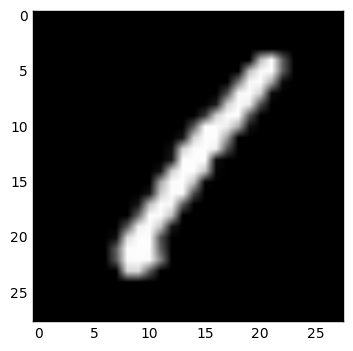

In [102]:
plt.imshow(df.iloc[0,1:].values.reshape(28,28),cmap=plt.cm.gray)

In [125]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(30, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(45, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 38s 1ms/step - loss: 0.3409 - acc: 0.8940 - val_loss: 0.1319 - val_acc: 0.9597
Epoch 2/10
31500/31500 [==============================] - 33s 1ms/step - loss: 0.1015 - acc: 0.9689 - val_loss: 0.0936 - val_acc: 0.9735
Epoch 3/10
31500/31500 [==============================] - 32s 1ms/step - loss: 0.0727 - acc: 0.9773 - val_loss: 0.0704 - val_acc: 0.9789
Epoch 4/10
31500/31500 [==============================] - 31s 970us/step - loss: 0.0534 - acc: 0.9828 - val_loss: 0.0649 - val_acc: 0.9812
Epoch 5/10
31500/31500 [==============================] - 27s 858us/step - loss: 0.0434 - acc: 0.9868 - val_loss: 0.0653 - val_acc: 0.9807
Epoch 6/10
31500/31500 [==============================] - 30s 948us/step - loss: 0.0347 - acc: 0.9891 - val_loss: 0.0531 - val_acc: 0.9838
Epoch 7/10
31500/31500 [==============================] - 28s 898us/step - loss: 0.0310 - acc: 0.9902 - val_loss: 0.0557 -

In [122]:
test_df = pd.read_csv('test.csv')
test = test_df.values.reshape(test_df.shape[0], 28, 28, 1)
test = test / 255.
pred = model.predict_classes(test)

28000/28000 [==============================] - 13s 458us/step


In [123]:

test_df['Label'] = pred
test_df['ImageId'] = range(1,test_df.shape[0] + 1)
test_df[['ImageId', 'Label']].to_csv('submission2.csv', index=False)